### Pytorch Basics: Tensors and Gradients 

In [1]:
import torch

### Tensors

In [2]:
t1 = torch.tensor(4.)
t1

tensor(4.)

4. shorthand for 4.0

In [3]:
t1.dtype

torch.float32

In [4]:
#Vector

t2 = torch.tensor([1., 2, 3, 4])
t2

tensor([1., 2., 3., 4.])

In [5]:
#Matrix 
t3 = torch.tensor([[5., 6], [7,8], [9,10]])
t3

tensor([[ 5.,  6.],
        [ 7.,  8.],
        [ 9., 10.]])

In [6]:
# 3D array
t4 = torch.tensor([
                   [[11, 12, 13],
                    [13, 14, 15]],
                  [[15, 16, 17],
                   [17, 18, 19.]]])
t4

tensor([[[11., 12., 13.],
         [13., 14., 15.]],

        [[15., 16., 17.],
         [17., 18., 19.]]])

In [7]:
print(t1.shape)
print(t2.shape)
print(t3.shape)
print(t4.shape)

torch.Size([])
torch.Size([4])
torch.Size([3, 2])
torch.Size([2, 2, 3])


### Tensor Operations and Gradients

In [8]:
#create tensors
x = torch.tensor(3.)
w = torch.tensor(4., requires_grad = True)
b = torch.tensor(5., requires_grad = True)

In [9]:
y = w * x + b 
y

tensor(17., grad_fn=<AddBackward0>)

In [10]:
#compute derivatives
y.backward()

In [11]:
# Display gradients
print('dy/dx:', x.grad)
print('dy/dw:', w.grad)
print('dy/db:', b.grad)

dy/dx: None
dy/dw: tensor(3.)
dy/db: tensor(1.)


### Interoperability with Numpy

In [12]:
import numpy as np

In [13]:
x = np.array([[1., 3.], [3., 4.]])
x

array([[1., 3.],
       [3., 4.]])

In [14]:
#convert the numpy array to a torch tensor 
y = torch.from_numpy(x)
print(y)

#or

y = torch.tensor(x)
print(y)

tensor([[1., 3.],
        [3., 4.]], dtype=torch.float64)
tensor([[1., 3.],
        [3., 4.]], dtype=torch.float64)


In [15]:
x.dtype, y.dtype

(dtype('float64'), torch.float64)

In [16]:
#convert a torch tensor to a numpy array
z = y.numpy()
z

array([[1., 3.],
       [3., 4.]])

In [17]:
#torch version of np.full

t5 = torch.full((3,2), 50)
t5

tensor([[50, 50],
        [50, 50],
        [50, 50]])

In [18]:
#concatenating 2 tensors with compatible shapes 
t7 = torch.cat((t3, t5))
t7

tensor([[ 5.,  6.],
        [ 7.,  8.],
        [ 9., 10.],
        [50., 50.],
        [50., 50.],
        [50., 50.]])

In [19]:
#compute sin of each element
t6 = torch.sin(t7)
t6

tensor([[-0.9589, -0.2794],
        [ 0.6570,  0.9894],
        [ 0.4121, -0.5440],
        [-0.2624, -0.2624],
        [-0.2624, -0.2624],
        [-0.2624, -0.2624]])

In [20]:
t8 = t6.reshape(3, 2, 2)
t8

tensor([[[-0.9589, -0.2794],
         [ 0.6570,  0.9894]],

        [[ 0.4121, -0.5440],
         [-0.2624, -0.2624]],

        [[-0.2624, -0.2624],
         [-0.2624, -0.2624]]])

### Linear Regression with Pytorch

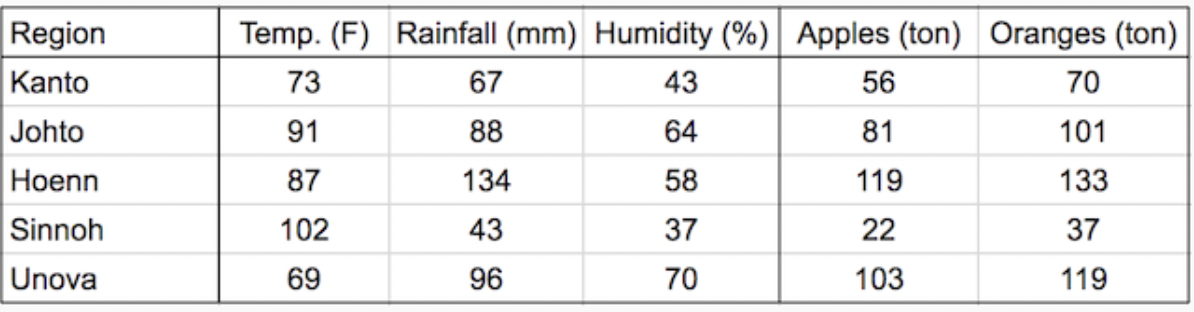

In [21]:
#input (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43],
                   [91, 88, 64],
                   [87, 134, 58],
                   [102, 43, 37],
                   [69, 96, 70]], dtype = 'float32')

In [22]:
#targets (tons of apples and oranges)

targets = np.array([[56, 70],
                    [81, 101],
                    [119, 133],
                    [22, 37],
                    [103, 119]], dtype = 'float32')

In [23]:
inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)
print(inputs)
print(targets)

tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.]])
tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])


In [24]:
w = torch.randn(2, 3, requires_grad = True)
b = torch.randn(2, requires_grad = True)
print(w)
print(b)

tensor([[-0.2165,  0.6760, -0.3774],
        [-2.6224, -0.1181, -2.3660]], requires_grad=True)
tensor([0.8635, 0.0820], requires_grad=True)


randn creates a tensor with the given shape, with elements picked randomly from a normal distribtuiuon with mean 0 and standard deviation 1


In [25]:
def model(x):
  return x @ w.t() + b

@ does matrix multiplication in PyTorch

.t method returns the transpose of a tensor 

In [26]:
#generate predictions
preds = model(inputs)
print(preds)

tensor([[  14.1284, -301.0096],
        [  16.5040, -400.3808],
        [  50.7319, -381.1278],
        [  -6.1105, -360.0296],
        [  24.4109, -357.8282]], grad_fn=<AddBackward0>)


In [27]:
#compare with targets
print(targets)

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])


### Loss function

In [28]:
diff = preds - targets
diff_sqr = diff * diff

In [29]:
torch.sum(diff_sqr)/diff.numel()

tensor(105589.6016, grad_fn=<DivBackward0>)

In [30]:
#MSE loss
def mse(t1, t2):
  diff = t1-t2
  return torch.sum(diff*diff)/diff.numel()

torch.sum returns the sum of all the elements in a tensor

.numel method returns the number of elements in a tensor 

In [31]:
#compute loss
loss = mse(preds, targets)
print(loss)

tensor(105589.6016, grad_fn=<DivBackward0>)


### Compute Gradients

In [32]:
#compute gradients
loss.backward()

In [33]:
#gradients for weights
print(w)
print(w.grad)

tensor([[-0.2165,  0.6760, -0.3774],
        [-2.6224, -0.1181, -2.3660]], requires_grad=True)
tensor([[ -4631.0015,  -5276.4565,  -3285.8203],
        [-38167.3320, -40144.0156, -25185.8555]])


In [34]:
#gradients for bias
print(b)
print(b.grad)

tensor([0.8635, 0.0820], requires_grad=True)
tensor([ -56.2671, -452.0753])


In [35]:
w.grad.zero_()
b.grad.zero_()
print(w.grad)
print(b.grad)

tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([0., 0.])


we reset the gradients to zero by calling .zero_() method

### Adjust weights and biases using gradient descent 

In [36]:
#generate predictions
preds = model(inputs)
print(preds)

tensor([[  14.1284, -301.0096],
        [  16.5040, -400.3808],
        [  50.7319, -381.1278],
        [  -6.1105, -360.0296],
        [  24.4109, -357.8282]], grad_fn=<AddBackward0>)


In [37]:
#calculate the loss
loss = mse(preds, targets)
print(loss)

tensor(105589.6016, grad_fn=<DivBackward0>)


In [38]:
#compute gradients
loss.backward()
print(w.grad)
print(b.grad)

tensor([[ -4631.0015,  -5276.4565,  -3285.8203],
        [-38167.3320, -40144.0156, -25185.8555]])
tensor([ -56.2671, -452.0753])


In [39]:
#adjust weight and reset gradients
with torch.no_grad():
  w -= w.grad * 1e-5
  b -= b.grad * 1e-5
  w.grad.zero_()
  b.grad.zero_()

torch.no_grad is used to indicate to PyTorch that we shouldn't track, calculate or modify gradients while updating the weights and biases 

In [40]:
print(w)
print(b)

tensor([[-0.1702,  0.7288, -0.3445],
        [-2.2408,  0.2833, -2.1142]], requires_grad=True)
tensor([0.8641, 0.0865], requires_grad=True)


In [41]:
#calculate loss
preds = model(inputs)
loss = mse(preds, targets)
print(loss)

tensor(71329.7500, grad_fn=<DivBackward0>)


###Train for multiple epochs

In [42]:
#train for 100 epochs
for i in range(500):
  preds = model(inputs)
  loss = mse(preds, targets)
  loss.backward()
  with torch.no_grad():
    w -= w.grad * 1e-5
    b -= b.grad * 1e-5
    w.grad.zero_()
    b.grad.zero_()

In [43]:
#calculate loss
preds = model(inputs)
loss = mse(preds, targets)
print(loss)

tensor(101.3870, grad_fn=<DivBackward0>)


In [44]:
preds

tensor([[ 57.8997,  71.1265],
        [ 78.1762,  91.2690],
        [126.6818, 153.0259],
        [ 24.0531,  40.6520],
        [ 93.3450, 100.6832]], grad_fn=<AddBackward0>)

In [45]:
targets

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])

### Linear regression using PyTorch built-ins

In [46]:
import torch.nn as nn

In [47]:
#input (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43],
                   [91, 88, 64],
                   [87, 134, 58],
                   [102, 43, 37],
                   [69, 96, 70],
                   [73, 67, 43],
                   [91, 88, 64],
                   [87, 134, 58],
                   [102, 43, 37],
                   [69, 96, 70],
                   [73, 67, 43],
                   [91, 88, 64],
                   [87, 134, 58],
                   [102, 43, 37],
                   [69, 96, 70]], dtype = 'float32')

In [48]:
#targets (apples, oranges)
targets = np.array([[56, 70],
                    [81, 101],
                    [119, 133],
                    [22, 37],
                    [103, 119],
                    [56, 70],
                    [81, 101],
                    [119, 133],
                    [22, 37],
                    [103, 119],
                    [56, 70],
                    [81, 101],
                    [119, 133],
                    [22, 37],
                    [103, 119]], dtype = 'float32')

In [49]:
inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)

Dataset and DataLoader

In [50]:
from torch.utils.data import TensorDataset

In [51]:
#define dataset

train_ds = TensorDataset(inputs, targets)
train_ds[0:3]

(tensor([[ 73.,  67.,  43.],
         [ 91.,  88.,  64.],
         [ 87., 134.,  58.]]), tensor([[ 56.,  70.],
         [ 81., 101.],
         [119., 133.]]))

TensorDataset, which allows access to rows from inputs and targets as tuples, and provides standard APIs for working with many different types of datasets in PyTorch.





In [52]:
from torch.utils.data import DataLoader

In [53]:
# Define data loader
batch_size = 5
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

In [54]:
for xb, yb in train_dl:
    print(xb)
    print(yb)
    break

tensor([[ 91.,  88.,  64.],
        [102.,  43.,  37.],
        [102.,  43.,  37.],
        [ 87., 134.,  58.],
        [ 73.,  67.,  43.]])
tensor([[ 81., 101.],
        [ 22.,  37.],
        [ 22.,  37.],
        [119., 133.],
        [ 56.,  70.]])


nn.Linear

In [55]:
# Define model
model = nn.Linear(3, 2)
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[-0.5019, -0.1415, -0.1261],
        [-0.0828, -0.0981,  0.1664]], requires_grad=True)
Parameter containing:
tensor([-0.2225, -0.1187], requires_grad=True)


Instead of initializing the weights & biases manually, we can define the model using the nn.Linear class from PyTorch, which does it automatically.

In [56]:
# Parameters
list(model.parameters())

[Parameter containing:
 tensor([[-0.5019, -0.1415, -0.1261],
         [-0.0828, -0.0981,  0.1664]], requires_grad=True),
 Parameter containing:
 tensor([-0.2225, -0.1187], requires_grad=True)]

PyTorch models also have a helpful .parameters method, which returns a list containing all the weights and bias matrices present in the model. For our linear regression model, we have one weight matrix and one bias matrix.

In [57]:
# Generate predictions
preds = model(inputs)
preds

tensor([[-51.7667,  -5.5771],
        [-66.4211,  -5.6319],
        [-70.1654, -10.8115],
        [-62.1706,  -6.6222],
        [-57.2669,  -3.5968],
        [-51.7667,  -5.5771],
        [-66.4211,  -5.6319],
        [-70.1654, -10.8115],
        [-62.1706,  -6.6222],
        [-57.2669,  -3.5968],
        [-51.7667,  -5.5771],
        [-66.4211,  -5.6319],
        [-70.1654, -10.8115],
        [-62.1706,  -6.6222],
        [-57.2669,  -3.5968]], grad_fn=<AddmmBackward0>)

Loss Function

In [58]:
# Import nn.functional
import torch.nn.functional as F

The nn.functional package contains many useful loss functions and several other utilities.



In [59]:
# Define loss function
loss_fn = F.mse_loss

Instead of defining a loss function manually, we can use the built-in loss function mse_loss.



In [60]:
loss = loss_fn(model(inputs), targets)
print(loss)

tensor(15659.7275, grad_fn=<MseLossBackward0>)


Optimizer

In [61]:
# Define optimizer
opt = torch.optim.SGD(model.parameters(), lr=1e-5)

Instead of manually manipulating the model's weights & biases using gradients, we can use the optimizer optim.SGD. SGD is short for "stochastic gradient descent". 

Note that model.parameters() is passed as an argument to optim.SGD so that the optimizer knows which matrices should be modified during the update step. 

Train the model

Let's define a utility function fit that trains the model for a given number of epochs.

In [62]:
# Utility function to train the model
def fit(num_epochs, model, loss_fn, opt, train_dl):
    
    # Repeat for given number of epochs
    for epoch in range(num_epochs):
        
        # Train with batches of data
        for xb,yb in train_dl:
            
            # 1. Generate predictions
            pred = model(xb)
            
            # 2. Calculate loss
            loss = loss_fn(pred, yb)
            
            # 3. Compute gradients
            loss.backward()
            
            # 4. Update parameters using gradients
            opt.step()
            
            # 5. Reset the gradients to zero
            opt.zero_grad()
        
        # Print the progress
        if (epoch+1) % 10 == 0:
            print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

We use the data loader defined earlier to get batches of data for every iteration.

Instead of updating parameters (weights and biases) manually, we use opt.step to perform the update and opt.zero_grad to reset the gradients to zero.

We've also added a log statement that prints the loss from the last batch of data for every 10th epoch to track training progress. loss.item returns the actual value stored in the loss tensor.

In [63]:
fit(100, model, loss_fn, opt, train_dl)

Epoch [10/100], Loss: 204.3181
Epoch [20/100], Loss: 139.6629
Epoch [30/100], Loss: 183.9968
Epoch [40/100], Loss: 83.2052
Epoch [50/100], Loss: 79.2821
Epoch [60/100], Loss: 71.1832
Epoch [70/100], Loss: 15.7133
Epoch [80/100], Loss: 36.5057
Epoch [90/100], Loss: 10.4042
Epoch [100/100], Loss: 9.8252


In [64]:
# Generate predictions
preds = model(inputs)
preds

tensor([[ 58.0909,  71.4955],
        [ 80.9505,  99.3685],
        [120.1743, 134.2322],
        [ 26.3949,  43.6369],
        [ 96.5829, 112.9703],
        [ 58.0909,  71.4955],
        [ 80.9505,  99.3685],
        [120.1743, 134.2322],
        [ 26.3949,  43.6369],
        [ 96.5829, 112.9703],
        [ 58.0909,  71.4955],
        [ 80.9505,  99.3685],
        [120.1743, 134.2322],
        [ 26.3949,  43.6369],
        [ 96.5829, 112.9703]], grad_fn=<AddmmBackward0>)

In [65]:
# Compare with targets
targets

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.],
        [ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.],
        [ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])

In [66]:
model(torch.tensor([[75, 63, 44.]]))

tensor([[54.4417, 68.5208]], grad_fn=<AddmmBackward0>)

### Image Classification Using Logistic Regression

In [67]:
import torch 
import torchvision
from torchvision.datasets import MNIST

In [68]:
#download trainign data
dataset = MNIST(root='data/', download = True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [69]:
len(dataset)

60000

In [70]:
test_dataset = MNIST(root='data/', train = False)
len(test_dataset)

10000

In [71]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x7FEA1923F050>, 5)

In [72]:
import matplotlib.pyplot as plt
%matplotlib inline

Label: 5


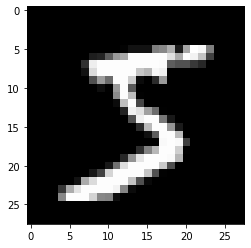

In [73]:
image, label = dataset[0]
plt.imshow(image, cmap = 'gray')
print('Label:', label)

Label: 3


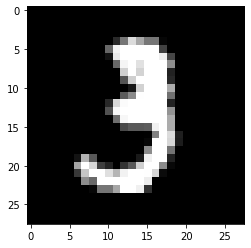

In [74]:
image, label = dataset[10]
plt.imshow(image, cmap = 'gray')
print('Label:', label)

In [75]:
import torchvision.transforms as transforms

In [76]:
# MNIST dataset (images and labels)
dataset = MNIST(root='data/', 
                train=True,
                transform=transforms.ToTensor())

The torchvision.transforms module contains many such predefined functions. We'll use the ToTensor transform to convert images into PyTorch tensors.

In [77]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


The first dimension tracks color channels. The second and third dimensions represent pixels along the height and width of the image, respectively. 

In [78]:
print(img_tensor[0,10:15,10:15])
print(torch.max(img_tensor), torch.min(img_tensor))

tensor([[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
        [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
        [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
        [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
        [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]])
tensor(1.) tensor(0.)


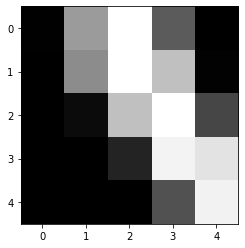

In [79]:
#plot the image by passing in the 28x28 matrix
plt.imshow(img_tensor[0, 10:15, 10:15], cmap='gray')

### Training and Validation Datasets

In [80]:
from torch.utils.data import random_split

train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [81]:
from torch.utils.data import DataLoader

batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

### Model

In [82]:
import torch.nn as nn

input_size = 28*28
num_classes = 10

# Logistic regression model
model = nn.Linear(input_size, num_classes)

In [83]:
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[ 0.0187, -0.0105, -0.0216,  ..., -0.0034, -0.0274,  0.0292],
        [-0.0295,  0.0155, -0.0191,  ...,  0.0348, -0.0343, -0.0217],
        [ 0.0258, -0.0057,  0.0078,  ..., -0.0344, -0.0036, -0.0293],
        ...,
        [-0.0275, -0.0231,  0.0003,  ...,  0.0111, -0.0028, -0.0347],
        [ 0.0244,  0.0319,  0.0133,  ..., -0.0120, -0.0228, -0.0313],
        [-0.0305,  0.0177,  0.0056,  ..., -0.0215,  0.0243,  0.0289]],
       requires_grad=True)

In [84]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([ 0.0214, -0.0354,  0.0154,  0.0175,  0.0166, -0.0205,  0.0252,  0.0031,
         0.0242,  0.0035], requires_grad=True)

In [ ]:
# for images, labels in train_loader:
#     print(labels)
#     print(images.shape)
#     outputs = model(images)
#     print(outputs)
#     break

In [86]:
images.shape

torch.Size([128, 1, 28, 28])

In [87]:
images.reshape(128,784)

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

The code above leads to an error because our input data does not have the right shape. Our images are of the shape 1x28x28, but we need them to be vectors of size 784, i.e., we need to flatten them. We'll use the .reshape method of a tensor, which will allow us to efficiently 'view' each image as a flat vector without really creating a copy of the underlying data. To include this additional functionality within our model, we need to define a custom model by extending the nn.Module class from PyTorch.

In [88]:
class Person:
    # Class constructor
    def __init__(self, name, age):
        # Object properties
        self.name = name
        self.age = age
    
    # Method
    def say_hello(self):
        print("Hello my name is " + self.name + "!")

In [89]:
bob = Person("Bob", 32)

In [90]:
bob.name, bob.age

('Bob', 32)

In [91]:
bob.say_hello()

Hello my name is Bob!


In [92]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
model = MnistModel()

Inside the __init__ constructor method, we instantiate the weights and biases using nn.Linear. And inside the forward method, which is invoked when we pass a batch of inputs to the model, we flatten the input tensor and pass it into self.linear.

xb.reshape(-1, 28*28) indicates to PyTorch that we want a view of the xb tensor with two dimensions. The length along the 2nd dimension is 28*28 (i.e., 784). One argument to .reshape can be set to -1 (in this case, the first dimension) to let PyTorch figure it out automatically based on the shape of the original tensor.

Note that the model no longer has .weight and .bias attributes (as they are now inside the .linear attribute), but it does have a .parameters method that returns a list containing the weights and bias.

In [93]:
model.linear

Linear(in_features=784, out_features=10, bias=True)

In [94]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[-0.0088, -0.0046,  0.0288,  ...,  0.0257,  0.0338,  0.0303],
         [ 0.0326,  0.0240,  0.0247,  ...,  0.0264, -0.0092, -0.0242],
         [-0.0051,  0.0279,  0.0074,  ...,  0.0212,  0.0299,  0.0225],
         ...,
         [-0.0203, -0.0019, -0.0039,  ...,  0.0033, -0.0151, -0.0187],
         [ 0.0292,  0.0200,  0.0114,  ...,  0.0189, -0.0348, -0.0150],
         [-0.0109,  0.0241,  0.0302,  ..., -0.0285, -0.0287,  0.0160]],
        requires_grad=True), Parameter containing:
 tensor([-0.0160, -0.0044, -0.0197,  0.0151,  0.0064, -0.0008, -0.0094,  0.0045,
          0.0096,  0.0221], requires_grad=True)]

In [95]:
for images, labels in train_loader:
    print(images.shape)
    outputs = model(images)
    break

print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs[:2].data)

torch.Size([128, 1, 28, 28])
outputs.shape :  torch.Size([128, 10])
Sample outputs :
 tensor([[-3.8156e-01, -1.7237e-02, -3.7890e-01,  1.6062e-01, -5.9718e-02,
         -6.1306e-02, -1.1062e-01,  4.9654e-01,  1.7825e-01, -4.6315e-01],
        [-2.3248e-01,  1.2097e-01, -2.4116e-05, -2.6050e-03, -1.9570e-01,
          1.9840e-01, -1.4418e-01,  2.4106e-01,  1.4400e-01, -2.1459e-01]])


In [96]:
import torch.nn.functional as F

In [97]:
outputs[:2]

tensor([[-3.8156e-01, -1.7237e-02, -3.7890e-01,  1.6062e-01, -5.9718e-02,
         -6.1306e-02, -1.1062e-01,  4.9654e-01,  1.7825e-01, -4.6315e-01],
        [-2.3248e-01,  1.2097e-01, -2.4116e-05, -2.6050e-03, -1.9570e-01,
          1.9840e-01, -1.4418e-01,  2.4106e-01,  1.4400e-01, -2.1459e-01]],
       grad_fn=<SliceBackward0>)

In [98]:
# Apply softmax for each output row
probs = F.softmax(outputs, dim=1)

# Look at sample probabilities
print("Sample probabilities:\n", probs[:2].data)

# Add up the probabilities of an output row
print("Sum: ", torch.sum(probs[0]).item())

Sample probabilities:
 tensor([[0.0699, 0.1006, 0.0701, 0.1202, 0.0964, 0.0963, 0.0916, 0.1682, 0.1223,
         0.0644],
        [0.0788, 0.1122, 0.0994, 0.0991, 0.0817, 0.1212, 0.0861, 0.1265, 0.1148,
         0.0802]])
Sum:  1.0


torch.max returns each row's largest element and the corresponding index.

In [99]:
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([7, 7, 7, 7, 7, 8, 7, 8, 8, 7, 7, 8, 8, 8, 7, 7, 7, 8, 7, 6, 8, 7, 7, 7,
        8, 7, 8, 1, 7, 5, 7, 8, 5, 8, 7, 7, 4, 8, 7, 8, 7, 7, 8, 7, 8, 4, 7, 7,
        7, 7, 4, 7, 8, 7, 4, 8, 8, 7, 7, 7, 7, 7, 8, 8, 7, 5, 7, 5, 7, 5, 7, 7,
        7, 5, 7, 7, 7, 8, 7, 8, 4, 8, 7, 7, 8, 7, 5, 7, 7, 7, 7, 8, 8, 8, 8, 5,
        7, 7, 8, 7, 7, 4, 3, 7, 7, 7, 7, 8, 7, 7, 7, 4, 7, 4, 5, 7, 7, 7, 6, 7,
        7, 8, 8, 7, 7, 6, 5, 8])
tensor([0.1682, 0.1265, 0.1581, 0.1454, 0.1405, 0.1393, 0.1403, 0.1308, 0.1468,
        0.1657, 0.1278, 0.1479, 0.1418, 0.1308, 0.1240, 0.1965, 0.1218, 0.1463,
        0.1208, 0.1236, 0.1247, 0.1513, 0.1618, 0.1558, 0.1687, 0.1530, 0.1381,
        0.1483, 0.1478, 0.1215, 0.1717, 0.1586, 0.1397, 0.1329, 0.1357, 0.1397,
        0.1481, 0.1301, 0.1711, 0.1552, 0.1622, 0.1485, 0.1399, 0.1360, 0.1536,
        0.1367, 0.1596, 0.1729, 0.1247, 0.1440, 0.1301, 0.1887, 0.1379, 0.1759,
        0.1280, 0.1308, 0.1485, 0.1207, 0.1552, 0.1430, 0.1465, 0.1461, 0.1674,
       

In [100]:
labels

tensor([0, 4, 3, 3, 9, 8, 3, 1, 7, 5, 3, 4, 8, 7, 1, 0, 7, 9, 5, 6, 6, 8, 3, 0,
        9, 6, 9, 3, 6, 5, 0, 9, 4, 9, 1, 9, 3, 6, 3, 6, 4, 5, 5, 1, 9, 3, 7, 0,
        8, 8, 3, 0, 4, 8, 1, 1, 8, 1, 7, 7, 0, 3, 9, 9, 2, 6, 4, 9, 8, 9, 8, 1,
        2, 8, 7, 5, 6, 0, 3, 4, 6, 9, 7, 9, 9, 3, 9, 1, 2, 6, 1, 6, 6, 9, 7, 9,
        1, 7, 6, 3, 1, 6, 6, 8, 0, 2, 8, 6, 4, 6, 4, 2, 0, 1, 5, 7, 5, 8, 1, 4,
        9, 8, 1, 8, 2, 3, 1, 9])

In [101]:
outputs[:2]

tensor([[-3.8156e-01, -1.7237e-02, -3.7890e-01,  1.6062e-01, -5.9718e-02,
         -6.1306e-02, -1.1062e-01,  4.9654e-01,  1.7825e-01, -4.6315e-01],
        [-2.3248e-01,  1.2097e-01, -2.4116e-05, -2.6050e-03, -1.9570e-01,
          1.9840e-01, -1.4418e-01,  2.4106e-01,  1.4400e-01, -2.1459e-01]],
       grad_fn=<SliceBackward0>)

In [102]:
torch.sum(preds == labels)

tensor(15)

In [103]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

The == operator performs an element-wise comparison of two tensors with the same shape and returns a tensor of the same shape, containing True for unequal elements and False for equal elements. Passing the result to torch.sum returns the number of labels that were predicted correctly. Finally, we divide by the total number of images to get the accuracy.

In [104]:
accuracy(outputs, labels)

tensor(0.1172)

In [105]:
probs

tensor([[0.0699, 0.1006, 0.0701,  ..., 0.1682, 0.1223, 0.0644],
        [0.0788, 0.1122, 0.0994,  ..., 0.1265, 0.1148, 0.0802],
        [0.0661, 0.1068, 0.0719,  ..., 0.1581, 0.1154, 0.0558],
        ...,
        [0.0697, 0.1044, 0.0783,  ..., 0.1180, 0.1132, 0.0785],
        [0.0748, 0.0884, 0.0912,  ..., 0.1240, 0.0882, 0.0814],
        [0.1087, 0.0971, 0.0984,  ..., 0.1101, 0.1219, 0.0778]],
       grad_fn=<SoftmaxBackward0>)

In [106]:
outputs

tensor([[-3.8156e-01, -1.7237e-02, -3.7890e-01,  ...,  4.9654e-01,
          1.7825e-01, -4.6315e-01],
        [-2.3248e-01,  1.2097e-01, -2.4116e-05,  ...,  2.4106e-01,
          1.4400e-01, -2.1459e-01],
        [-4.2531e-01,  5.4468e-02, -3.4100e-01,  ...,  4.4667e-01,
          1.3201e-01, -5.9490e-01],
        ...,
        [-3.7844e-01,  2.5624e-02, -2.6237e-01,  ...,  1.4770e-01,
          1.0604e-01, -2.5991e-01],
        [-4.2977e-01, -2.6292e-01, -2.3194e-01,  ...,  7.5754e-02,
         -2.6519e-01, -3.4548e-01],
        [ 1.3334e-01,  2.0770e-02,  3.4259e-02,  ...,  1.4604e-01,
          2.4835e-01, -2.0046e-01]], grad_fn=<AddmmBackward0>)

In [107]:
loss_fn = F.cross_entropy

In [108]:
# Loss for current batch of data
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.3787, grad_fn=<NllLossBackward0>)


In [109]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    optimizer = opt_func(model.parameters(), lr)
    history = [] # for recording epoch-wise results
    
    for epoch in range(epochs):
        
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)

    return history

In [110]:
l1 = [1, 2, 3, 4, 5]

In [111]:
l2 = [x*2 for x in l1]
l2

[2, 4, 6, 8, 10]

In [113]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

In [114]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
    
model = MnistModel()

In [115]:
result0 = evaluate(model, val_loader)
result0

{'val_acc': 0.15615110099315643, 'val_loss': 2.307847499847412}

In [133]:
history1 = fit(20, 0.0001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.6476, val_acc: 0.7573
Epoch [1], val_loss: 1.6254, val_acc: 0.7618
Epoch [2], val_loss: 1.6038, val_acc: 0.7654
Epoch [3], val_loss: 1.5829, val_acc: 0.7678
Epoch [4], val_loss: 1.5626, val_acc: 0.7709
Epoch [5], val_loss: 1.5428, val_acc: 0.7740
Epoch [6], val_loss: 1.5236, val_acc: 0.7764
Epoch [7], val_loss: 1.5050, val_acc: 0.7787
Epoch [8], val_loss: 1.4869, val_acc: 0.7805
Epoch [9], val_loss: 1.4693, val_acc: 0.7823
Epoch [10], val_loss: 1.4522, val_acc: 0.7842
Epoch [11], val_loss: 1.4355, val_acc: 0.7866
Epoch [12], val_loss: 1.4194, val_acc: 0.7877
Epoch [13], val_loss: 1.4036, val_acc: 0.7892
Epoch [14], val_loss: 1.3883, val_acc: 0.7912
Epoch [15], val_loss: 1.3735, val_acc: 0.7918
Epoch [16], val_loss: 1.3590, val_acc: 0.7933
Epoch [17], val_loss: 1.3449, val_acc: 0.7942
Epoch [18], val_loss: 1.3312, val_acc: 0.7960
Epoch [19], val_loss: 1.3178, val_acc: 0.7970


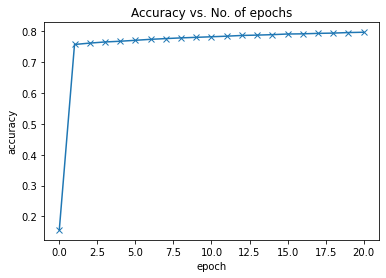

In [134]:
history = [result0] + history1
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

### Test

In [135]:
# Define test dataset
test_dataset = MNIST(root='data/', 
                     train=False,
                     transform=transforms.ToTensor())

Shape: torch.Size([1, 28, 28])
Label: 7


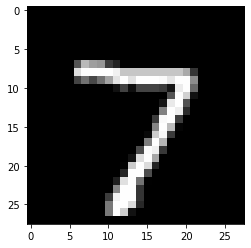

In [136]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Shape:', img.shape)
print('Label:', label)

In [137]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds = torch.max(yb, dim=1)
    return preds[0].item()

Label: 7 , Predicted: 7


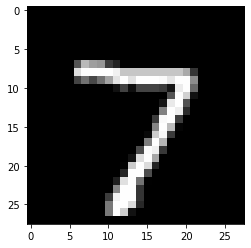

In [138]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 0 , Predicted: 0


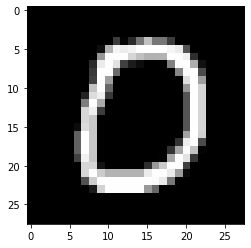

In [139]:
img, label = test_dataset[10]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 9 , Predicted: 3


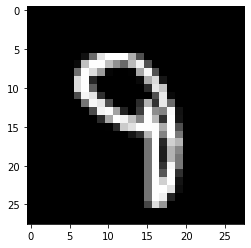

In [140]:
img, label = test_dataset[193]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 2 , Predicted: 8


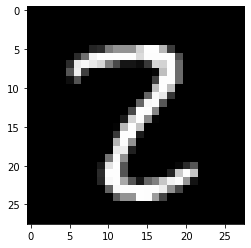

In [141]:
img, label = test_dataset[1839]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

In [142]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model, test_loader)
result

{'val_acc': 0.805468738079071, 'val_loss': 1.2964026927947998}

### Saving and loading the model

In [143]:
torch.save(model.state_dict(), 'mnist-logistic.pth')

The .state_dict method returns an OrderedDict containing all the weights and bias matrices mapped to the right attributes of the model.

In [144]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0301, -0.0157, -0.0353,  ..., -0.0193,  0.0223, -0.0306],
                      [-0.0088,  0.0227, -0.0174,  ..., -0.0218,  0.0148, -0.0083],
                      [-0.0290, -0.0082, -0.0152,  ...,  0.0235, -0.0196,  0.0006],
                      ...,
                      [ 0.0304,  0.0134,  0.0131,  ...,  0.0295, -0.0133, -0.0005],
                      [ 0.0279,  0.0234, -0.0220,  ...,  0.0290,  0.0197, -0.0056],
                      [ 0.0034,  0.0342,  0.0299,  ...,  0.0189, -0.0070,  0.0205]])),
             ('linear.bias',
              tensor([ 0.0082,  0.0445, -0.0367, -0.0355,  0.0455, -0.0280,  0.0202,  0.0338,
                      -0.0364,  0.0028]))])

In [145]:
model2 = MnistModel()

In [146]:
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0287,  0.0259,  0.0311,  ..., -0.0115, -0.0146,  0.0304],
                      [ 0.0180, -0.0154, -0.0182,  ..., -0.0142,  0.0051,  0.0042],
                      [ 0.0034, -0.0166,  0.0024,  ..., -0.0082,  0.0241,  0.0307],
                      ...,
                      [ 0.0038, -0.0046,  0.0354,  ..., -0.0253,  0.0135, -0.0088],
                      [ 0.0316, -0.0027, -0.0207,  ...,  0.0299,  0.0136,  0.0337],
                      [-0.0307, -0.0335, -0.0105,  ...,  0.0241, -0.0216,  0.0012]])),
             ('linear.bias',
              tensor([-3.4197e-02, -1.5796e-02, -3.0128e-02, -2.7476e-02,  4.2695e-04,
                       1.2449e-02,  1.9362e-02,  3.4618e-02,  1.6970e-05,  2.1388e-02]))])

In [147]:
evaluate(model2, test_loader)

{'val_acc': 0.06962890923023224, 'val_loss': 2.334437847137451}

In [148]:
model2.load_state_dict(torch.load('mnist-logistic.pth'))
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0301, -0.0157, -0.0353,  ..., -0.0193,  0.0223, -0.0306],
                      [-0.0088,  0.0227, -0.0174,  ..., -0.0218,  0.0148, -0.0083],
                      [-0.0290, -0.0082, -0.0152,  ...,  0.0235, -0.0196,  0.0006],
                      ...,
                      [ 0.0304,  0.0134,  0.0131,  ...,  0.0295, -0.0133, -0.0005],
                      [ 0.0279,  0.0234, -0.0220,  ...,  0.0290,  0.0197, -0.0056],
                      [ 0.0034,  0.0342,  0.0299,  ...,  0.0189, -0.0070,  0.0205]])),
             ('linear.bias',
              tensor([ 0.0082,  0.0445, -0.0367, -0.0355,  0.0455, -0.0280,  0.0202,  0.0338,
                      -0.0364,  0.0028]))])

In [149]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model2, test_loader)
result

{'val_acc': 0.805468738079071, 'val_loss': 1.2964026927947998}